In [14]:
pip install pandas


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [166]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [167]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [15]:
import os
import pandas as pd
import numpy as np

In [2]:
"""
Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
"""

'\nModality (01 = full-AV, 02 = video-only, 03 = audio-only).\n\nVocal channel (01 = speech, 02 = song).\n\nEmotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).\n\nEmotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the \'neutral\' emotion.\n\nStatement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").\n\nRepetition (01 = 1st repetition, 02 = 2nd repetition).\n\nActor (01 to 24. Odd numbered actors are male, even numbered actors are female).\n'

In [6]:
## we want to take count corresponding to each emotion from dataset
emotions_counts = []

for speech in os.listdir('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24'):
  for wav in os.listdir(os.path.join('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24', speech)):
    emotions_counts.append(wav.split('-')[2])

In [8]:
## lets see whether the count of emotions matches with dataset size which is 1440
print(len(emotions_counts))

1440


In [18]:
emotions_counts = np.array(emotions_counts)
df = pd.DataFrame(emotions_counts)

In [20]:
df.describe()

,0
count,1440
unique,8
top,05
freq,192


In [36]:
## We have total 8 different emotions 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
df.nunique().sum()

8

In [41]:
print(df)

       0
0     05
1     06
2     06
3     05
4     07
...   ..
1435  03
1436  03
1437  02
1438  02
1439  01

[1440 rows x 1 columns]


In [60]:
## Now task is to take count corresponding to each emotion
counts = df[0].value_counts().sort_index()
print(counts)

0
01     96
02    192
03    192
04    192
05    192
06    192
07    192
08    192
Name: count, dtype: int64


In [55]:
emotions = {'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [61]:
emtns = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disguist', 'surprised']

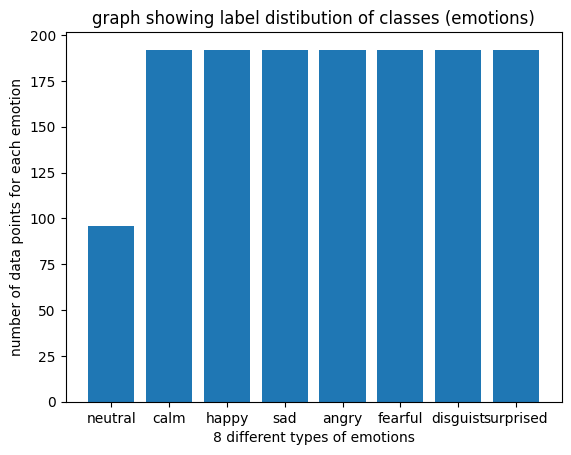

In [62]:
import matplotlib.pyplot as plt
plt.bar(emtns, counts)
plt.title('graph showing label distibution of classes (emotions)')
plt.xlabel('8 different types of emotions')
plt.ylabel('number of data points for each emotion')
plt.show()

In [76]:
## Lets also look at dataset of TESS
tess_dict_old = []

for wav in os.listdir('/Users/umesh/Desktop/Speech_recognition_project/TESS'):
    tess_dict_old.append(wav.split('_')[2].split('.')[0])

In [77]:
## check its size
print(len(tess_dict_old))
print(tess_dict_old)

2800
['happy', 'disgust', 'happy', 'neutral', 'fear', 'neutral', 'happy', 'neutral', 'angry', 'angry', 'ps', 'sad', 'fear', 'neutral', 'angry', 'sad', 'happy', 'neutral', 'sad', 'disgust', 'disgust', 'fear', 'disgust', 'neutral', 'angry', 'fear', 'angry', 'disgust', 'angry', 'sad', 'sad', 'ps', 'angry', 'ps', 'angry', 'fear', 'neutral', 'ps', 'neutral', 'fear', 'happy', 'disgust', 'happy', 'happy', 'happy', 'disgust', 'ps', 'sad', 'disgust', 'ps', 'angry', 'neutral', 'fear', 'happy', 'neutral', 'fear', 'angry', 'fear', 'ps', 'neutral', 'happy', 'fear', 'fear', 'happy', 'happy', 'neutral', 'fear', 'neutral', 'ps', 'sad', 'ps', 'angry', 'sad', 'sad', 'neutral', 'sad', 'ps', 'disgust', 'ps', 'neutral', 'fear', 'sad', 'disgust', 'sad', 'happy', 'angry', 'fear', 'fear', 'fear', 'fear', 'sad', 'fear', 'angry', 'fear', 'happy', 'sad', 'ps', 'ps', 'neutral', 'disgust', 'neutral', 'angry', 'neutral', 'angry', 'happy', 'ps', 'fear', 'fear', 'sad', 'neutral', 'sad', 'fear', 'sad', 'ps', 'fear', '

In [78]:
df2 = pd.DataFrame(tess_dict_old)
df2.shape

(2800, 1)

In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2800 non-null   object
dtypes: object(1)
memory usage: 22.0+ KB


In [81]:
df2.describe()

,0
count,2800
unique,7
top,happy
freq,400


In [91]:
values = df2.value_counts()
print(values)

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64


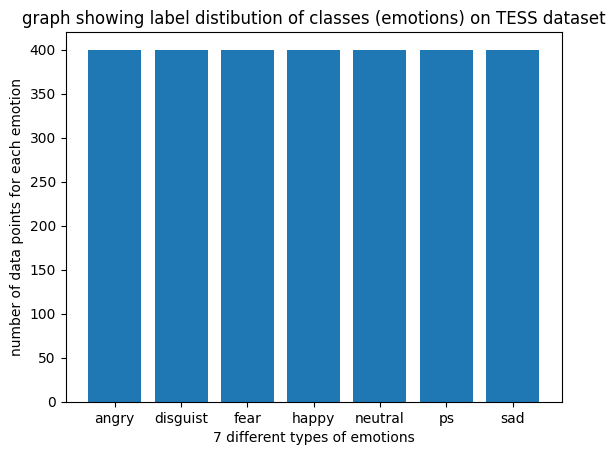

In [92]:
emtns = ['angry', 'disguist', 'fear', 'happy', 'neutral', 'ps', 'sad']

plt.bar(emtns, values)
plt.title('graph showing label distibution of classes (emotions) on TESS dataset')
plt.xlabel('7 different types of emotions')
plt.ylabel('number of data points for each emotion')
plt.show()

In [93]:
labels = {}
labels['angry'] = 192 + 400
labels['disguist'] = 192 + 400
labels['fear'] = 192 + 400
labels['happy'] = 192 + 400
labels['neutral'] = 96
labels['sad'] = 192 + 400
labels['calm'] = 192
labels['surprised'] = 192

print(labels)

{'angry': 592, 'disguist': 592, 'fear': 592, 'happy': 592, 'neutral': 96, 'sad': 592, 'calm': 192, 'surprised': 192}


In [42]:
pip install librosa 

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install soundfile 

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install pyaudio

  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-universal2-cpython-311
      creating build/lib.macosx-10.9-universal2-cpython-311/pyaudio
      copying src/pyaudio/__init__.py -> build/lib.macosx-10.9-universal2-cpython-311/pyaudio
      running build_ext
      building 'pyaudio._portaudio' extension
      creating build/temp.macosx-10.9-universal2-cpython-311
      creating build/temp.macosx-10.9-universal2-cpython-311/src
      creating build/temp.macosx-10.9-universal2-cpython-311/src/pyaudio
      clang -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -

In [47]:
!export CFLAGS="-I$(brew --prefix portaudio)/include"

In [48]:
!export LDFLAGS="-L$(brew --prefix portaudio)/lib"

In [49]:
pip install pyaudio

  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-universal2-cpython-311
      creating build/lib.macosx-10.9-universal2-cpython-311/pyaudio
      copying src/pyaudio/__init__.py -> build/lib.macosx-10.9-universal2-cpython-311/pyaudio
      running build_ext
      building 'pyaudio._portaudio' extension
      creating build/temp.macosx-10.9-universal2-cpython-311
      creating build/temp.macosx-10.9-universal2-cpython-311/src
      creating build/temp.macosx-10.9-universal2-cpython-311/src/pyaudio
      clang -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -

In [50]:
import librosa
import soundfile
import librosa.display

In [51]:
import wave
import contextlib
import sys

In [113]:
tess_aud_len = []

for item in os.listdir('/Users/umesh/Desktop/Speech_recognition_project/TESS'):
  fname = os.path.join('/Users/umesh/Desktop/Speech_recognition_project/TESS', item)
  try:
    with contextlib.closing(wave.open(fname,'r')) as f:
      frames = f.getnframes()
      rate = f.getframerate()
      f.close()
      duration = frames / float(rate)
      tess_aud_len.append(duration)
  except:
    e = sys.exc_info()[0]
print(len(tess_aud_len))

2798


In [115]:
print(type(tess_aud_len))
tess_aud_len[10:15]

<class 'list'>


[1.8214139428196936,
 2.9758335381338576,
 1.6590071270582454,
 2.203080199885312,
 1.5070860981404113]

In [116]:

speech_aud_len = []
for speech in os.listdir('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24'):
  for item in os.listdir(os.path.join('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24', speech)):

    fname = os.path.join('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24', speech, item)
    try:
      with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        f.close()
        duration = frames / float(rate)
        speech_aud_len.append(duration)

    except:
      e = sys.exc_info()[0]

print(len(speech_aud_len))
print(speech_aud_len[10:15])

1440
[3.8038125, 3.6703333333333332, 3.8705208333333334, 3.5702291666666666, 3.8037916666666667]


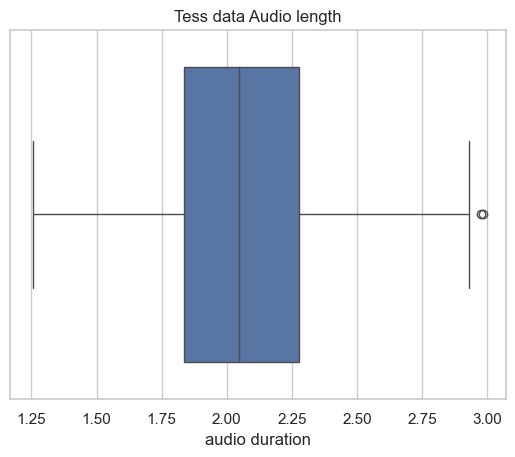

In [117]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x= tess_aud_len)
plt.title('Tess data Audio length')
plt.xlabel('audio duration')
plt.show()

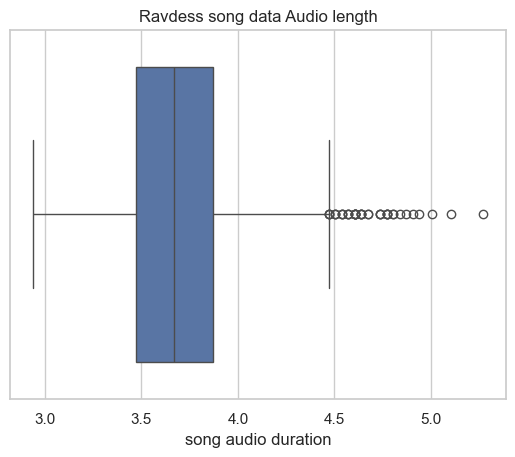

In [118]:

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x= speech_aud_len)
plt.title('Ravdess song data Audio length')
plt.xlabel('song audio duration')
plt.show()

In [119]:
from tqdm import tqdm

In [123]:
mel_tess =[]
mfcc_tess =[]


for i in os.listdir('/Users/umesh/Desktop/Speech_recognition_project/TESS'):

    y, sr = librosa.load(os.path.join('/Users/umesh/Desktop/Speech_recognition_project/TESS', i))
    mel_tess.append(np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis= 0))
    mfcc_tess.append(np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 13).T, axis=0))

print(len(mel_tess))
print(len(mfcc_tess))

2800
2800


In [126]:
print(mel_tess[0])

[1.42148929e-02 2.07301672e-03 7.85385142e-04 6.84337399e-04
 6.74218987e-04 1.15418993e-03 4.21819299e-01 1.98843575e+00
 3.40116787e+00 2.23182464e+00 1.80603015e+00 3.03912425e+00
 5.17524481e-01 1.34049833e+00 1.39645376e+01 5.44355583e+00
 1.79280806e+00 1.13578148e+01 1.43117828e+01 6.99941587e+00
 1.41654193e+00 3.55070901e+00 2.49253101e+01 5.00560265e+01
 8.33735847e+00 4.38063949e-01 4.62894535e+00 6.57520151e+00
 1.88913596e+00 2.86568332e+00 8.28846216e-01 1.45084095e+00
 1.61252201e+00 1.82946134e+00 3.28141475e+00 7.39169312e+00
 3.29310346e+00 3.28525692e-01 1.02286145e-01 9.79651451e-01
 1.53619838e+00 1.01851165e+00 8.19357038e-01 1.06755817e+00
 1.98713958e+00 1.77413583e+00 1.43276370e+00 5.74699044e-01
 1.10170531e+00 1.41814566e+00 2.08868098e+00 1.13458669e+00
 6.12544775e-01 8.71123433e-01 2.19432712e+00 1.52523673e+00
 1.33886307e-01 1.94539964e-01 1.29404411e-01 7.36365199e-01
 3.73084068e+00 4.59261560e+00 5.10322928e-01 2.21625984e-01
 3.46777380e-01 1.510842

In [127]:
mel_speech =[]
mfcc_speech =[]

for speech in tqdm(os.listdir('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24')):
  for i in os.listdir(os.path.join('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24', speech)):

    y, sr = librosa.load(os.path.join('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24', speech, i))
    mel_speech.append(np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis= 0))
    mfcc_speech.append(np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 13).T, axis=0))
  
print('****')
print(len(mel_speech))
print(len(mfcc_speech))

100%|██████████| 24/24 [00:37<00:00,  1.58s/it]

****
1440
1440


In [56]:
from scipy import hstack, vstack

In [130]:
for i in mel_tess:
    i = i.reshape(1, -1)
mel_feat_tess = vstack((mel_tess))
print(mel_feat_tess.shape)

(2800, 128)


/var/folders/g1/59v3z_793_g5rymttcvqyfcm0000gn/T/ipykernel_28163/2829548626.py:3: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  mel_feat_tess = vstack((mel_tess))


In [132]:
for i in mfcc_tess:
    i = i.reshape(1, -1)
mfcc_feat_tess = vstack((mfcc_tess))
print(mfcc_feat_tess.shape)

(2800, 13)


/var/folders/g1/59v3z_793_g5rymttcvqyfcm0000gn/T/ipykernel_28163/2740410362.py:3: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  mfcc_feat_tess = vstack((mfcc_tess))


In [135]:
feat_tess = hstack((mel_feat_tess, mfcc_feat_tess))
print(feat_tess.shape)

(2800, 141)


In [136]:
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [137]:
for i in mel_speech:
    i = i.reshape(1, -1)
mel_feat_speech = vstack(mel_speech)
print(mel_feat_speech.shape)

(1440, 128)


In [138]:
for i in mfcc_speech:
    i = i.reshape(1, -1)
mfcc_feat_speech = vstack(mfcc_speech)
print(mfcc_feat_speech.shape)

(1440, 13)


In [153]:
feat_speech = hstack((mel_feat_speech, mfcc_feat_speech))
print(feat_speech.shape)

(1440, 141)


In [154]:
features = vstack((feat_tess, feat_speech))
print(features.shape)

(4240, 141)


## Creating the Labels ##

In [143]:
## for TESS
emotions_tess = []
path_tess = []

for tess in tqdm(os.listdir('/Users/umesh/Desktop/Speech_recognition_project/TESS')):
    path_tess.append(os.path.join('/Users/umesh/Desktop/Speech_recognition_project/TESS', tess))
    emotions_tess.append(tess.split('_')[2].split('.')[0])


print(len(emotions_tess))
print(len(path_tess)) 

print(emotions_tess[0:5])
print(path_tess[0:5])

100%|██████████| 2800/2800 [00:00<00:00, 672895.85it/s]

2800
2800
['happy', 'disgust', 'happy', 'neutral', 'fear']
['/Users/umesh/Desktop/Speech_recognition_project/TESS/YAF_wire_happy.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/OAF_fat_disgust.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/OAF_bought_happy.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/OAF_fit_neutral.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/YAF_dead_fear.wav']


In [144]:
emotions_speech = []
path_speech = []

for speech in tqdm(os.listdir('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24')):
  for item in os.listdir(os.path.join('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24', speech)):
    path_speech.append(os.path.join('/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24', speech, item))
    emotions_speech.append(item.split('-')[2])

print(len(path_speech))
print(len(emotions_speech)) 

print(path_speech[0:5])
print(emotions_speech[0:5])

100%|██████████| 24/24 [00:00<00:00, 455.99it/s]

1440
1440
['/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24/Actor_16/03-01-05-01-02-01-16.wav', '/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24/Actor_16/03-01-06-01-02-02-16.wav', '/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24/Actor_16/03-01-06-02-01-02-16.wav', '/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24/Actor_16/03-01-05-02-01-01-16.wav', '/Users/umesh/Desktop/Speech_recognition_project/Audio_Speech_Actors_01-24/Actor_16/03-01-07-01-01-01-16.wav']
['05', '06', '06', '05', '07']


In [145]:
final_emotions = emotions_tess + emotions_speech
final_path = path_tess + path_speech
print(final_emotions[2000:2010])
print(final_path[2000:2010])

['sad', 'happy', 'disgust', 'neutral', 'fear', 'neutral', 'disgust', 'sad', 'ps', 'fear']
['/Users/umesh/Desktop/Speech_recognition_project/TESS/YAF_thought_sad.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/OAF_have_happy.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/OAF_talk_disgust.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/YAF_base_neutral.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/OAF_talk_fear.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/YAF_judge_neutral.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/OAF_lid_disgust.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/OAF_pain_sad.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/OAF_good_ps.wav', '/Users/umesh/Desktop/Speech_recognition_project/TESS/YAF_time_fear.wav']


In [146]:
data = {'path' : final_path, 'emotions' : final_emotions}
df = pd.DataFrame(data)
df.head()

,path,emotions
0,/Users/umesh/Desktop/Speech_recognition_projec...,happy
1,/Users/umesh/Desktop/Speech_recognition_projec...,disgust
2,/Users/umesh/Desktop/Speech_recognition_projec...,happy
3,/Users/umesh/Desktop/Speech_recognition_projec...,neutral
4,/Users/umesh/Desktop/Speech_recognition_projec...,fear


In [147]:
df['emotions'].unique()

array(['happy', 'disgust', 'neutral', 'fear', 'angry', 'ps', 'sad', '05',
       '06', '07', '04', '08', '03', '02', '01'], dtype=object)

In [148]:
df['emotions'].value_counts()

emotions
happy      400
disgust    400
neutral    400
fear       400
angry      400
ps         400
sad        400
05         192
06         192
07         192
04         192
08         192
03         192
02         192
01          96
Name: count, dtype: int64

In [201]:

df =df.replace({'emotions': {'01': 'neutral',
 '02': 'calm',
 '03': 'happy',
 '04': 'sad',
 '05': 'angry',
 '06': 'fear',
 '07': 'disgust',
 '08': 'surprised',
 'Pleasant': 'surprised',
 'ps' : 'surprised',
 'pleasant': 'surprised',
 'Fear': 'fear',
 'Sad':'sad'}})

df['emotions'].value_counts()

emotions
happy        592
disgust      592
fear         592
angry        592
surprised    592
sad          592
neutral      496
calm         192
Name: count, dtype: int64

In [202]:
df.shape

(4240, 2)

In [203]:
df_feat = pd.DataFrame(features)
df_feat.shape

(4240, 141)

In [204]:
df_new = pd.concat([df, df_feat], axis=1)
df_new.head()

,path,emotions,0,1,2,3,4,5,6,7,...,131,132,133,134,135,136,137,138,139,140
0,/Users/umesh/Desktop/Speech_recognition_projec...,happy,0.014215,0.002073,0.000785,0.000684,0.000674,0.001154,0.421819,1.988436,...,17.456249,-11.514587,-13.613383,-6.919799,-17.170826,5.161680,-5.580457,-12.243958,12.842889,-16.649307
1,/Users/umesh/Desktop/Speech_recognition_projec...,disgust,0.034006,0.001580,0.000312,0.000195,0.006751,0.113123,0.204935,0.356068,...,-10.768615,13.706544,5.475050,-15.858711,-0.268466,-11.191514,-0.086536,-2.064788,-4.152150,0.262011
2,/Users/umesh/Desktop/Speech_recognition_projec...,happy,0.785367,0.053158,0.003496,0.001581,0.002821,0.079478,0.382887,0.206982,...,-14.238811,-4.108815,3.110351,-9.245914,2.608693,-16.181166,-5.290768,-9.645020,-9.993869,-5.731284
3,/Users/umesh/Desktop/Speech_recognition_projec...,neutral,0.026474,0.000816,0.000038,0.000034,0.000362,0.062444,0.418382,0.112216,...,10.546044,17.410788,8.951071,-6.887239,-8.676446,-10.280824,1.392153,-9.340833,1.391863,-4.215302
4,/Users/umesh/Desktop/Speech_recognition_projec...,fear,0.223134,0.091978,0.017339,0.008613,0.008589,0.004729,0.031441,0.861633,...,15.900852,1.169668,-9.230703,-12.909408,-8.941622,-5.882546,3.384658,-20.601276,4.239819,-6.646860


In [205]:
df_new.to_csv("Dataset.csv", index=False)

In [6]:
import pandas as pd
import numpy as np
df_new = pd.read_csv("Dataset.csv")

In [7]:
y = df_new['emotions']
X = df_new.drop(columns=['path', 'emotions'])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,0.014215,0.002073,0.000785,0.000684,0.000674,0.001154,0.421819,1.988436,3.401168,2.231825,...,17.456250,-11.514587,-13.613383,-6.919799,-17.170826,5.161680,-5.580457,-12.243958,12.842889,-16.649307
1,0.034006,0.001580,0.000312,0.000195,0.006751,0.113123,0.204935,0.356069,0.349696,0.301480,...,-10.768615,13.706544,5.475050,-15.858711,-0.268466,-11.191514,-0.086536,-2.064788,-4.152150,0.262011
2,0.785367,0.053158,0.003496,0.001581,0.002821,0.079478,0.382887,0.206982,0.214300,0.362833,...,-14.238812,-4.108815,3.110351,-9.245914,2.608693,-16.181166,-5.290768,-9.645020,-9.993869,-5.731284
3,0.026474,0.000816,0.000038,0.000034,0.000362,0.062444,0.418382,0.112216,0.006168,0.001122,...,10.546044,17.410788,8.951071,-6.887238,-8.676446,-10.280824,1.392153,-9.340833,1.391863,-4.215302
4,0.223134,0.091978,0.017339,0.008613,0.008589,0.004729,0.031441,0.861633,1.564073,0.891957,...,15.900852,1.169668,-9.230703,-12.909408,-8.941622,-5.882546,3.384658,-20.601276,4.239819,-6.646860


## Preparing dataset for modeling

In [8]:
## preparing dataset for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3392, 141)
(3392,)
(848, 141)
(848,)


In [10]:
import tensorflow as tf
import tensorflow

In [11]:
from tensorflow.keras.utils import to_categorical
lb= LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.transform(y_test))

print(y_train.shape)
print(y_test.shape)
print(y_train[0:5])
print(y_test[0:5])


(3392, 8)
(848, 8)
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


In [12]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(3392, 141)
(848, 141)


In [13]:
## importing matrices
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

## Baseline CNN Model

In [14]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense, LSTM

In [214]:
model_cnn = Sequential([
    Conv1D(64, kernel_size=(8), activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(128, kernel_size=(8), activation='relu'),
    MaxPooling1D(pool_size=(4)),
    Dropout(0.2),

    Conv1D(128, kernel_size=(8), activation='relu'),
    MaxPooling1D(pool_size=(4)),
    Dropout(0.2),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='softmax')
])

In [215]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 134, 64)           576       
                                                                 
 conv1d_10 (Conv1D)          (None, 127, 128)          65664     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 31, 128)           0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 31, 128)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 24, 128)           131200    
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 6, 128)            0         
 g1D)                                                 

In [15]:
# Callbacks
import h5py
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score

class F1(Callback):

  def __init__(self,x_train, y_train,x_test, y_test):
      self.x = x_train
      self.y = y_train
      self.x_val = x_test
      self.y_val = y_test

  #def on_train_begin(self, logs={}):
    #self.val_f1s = []
   
  
  def on_epoch_end(self, epoch, logs={}):

    val_predict = (np.asarray(self.model.predict(self.x_val))).round()
    val_targ = self.y_val

    _val_f1 = round(f1_score(val_targ, val_predict, average= 'micro'), 4)
    
    #self.val_f1s.append(_val_f1)
    
    print('f1_score:{}'.format(_val_f1))
    
F1 = F1(X_train, y_train,X_test, y_test)

In [21]:

#es = EarlyStopping(monitor= 'val_precision', patience= 3)
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor= 'f1_score') 

In [218]:
all= [F1,mc]

In [219]:

# compiling and fitting
model_cnn.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=[tensorflow.keras.metrics.Precision()])
history= model_cnn.fit(X_train, y_train,batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks= all)

Epoch 1/50
27/27 [==============================] - 0s 6ms/step loss: 1.8158 - precision_4: 
f1_score:0.0
106/106 [==============================] - 5s 35ms/step - loss: 1.8138 - precision_4: 0.8196 - val_loss: 2.0116 - val_precision_4: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 7ms/step loss: 1.5520 - precision_4
f1_score:0.0047
106/106 [==============================] - 3s 29ms/step - loss: 1.5498 - precision_4: 0.8627 - val_loss: 1.8900 - val_precision_4: 1.0000
Epoch 3/50
27/27 [==============================] - 0s 7ms/step loss: 1.3465 - precision_4
f1_score:0.0727
106/106 [==============================] - 3s 30ms/step - loss: 1.3459 - precision_4: 0.8730 - val_loss: 1.7083 - val_precision_4: 1.0000
Epoch 4/50
27/27 [==============================] - 0s 6ms/step loss: 1.2039 - precision_4
f1_score:0.2011
106/106 [==============================] - 3s 29ms/step - loss: 1.2024 - precision_4: 0.8933 - val_loss: 1.4513 - val_precision_4: 0.9794
Epoch 5/50
27/27 

In [220]:
best_cnn_model = tensorflow.keras.models.load_model('/Users/umesh/Desktop/Speech_recognition_project/best_model.h5')

In [221]:

best_cnn_model.predict(X_test).shape

27/27 [==============================] - 0s 7ms/step


(848, 8)

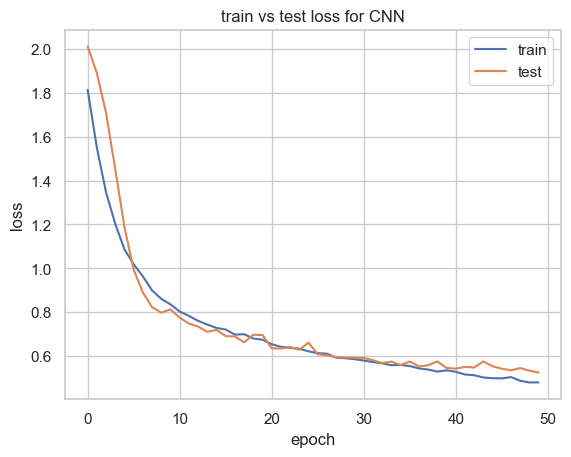

In [226]:

# loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs test loss for CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## LSTM model ##

In [16]:
from tensorflow import keras
from tensorflow.keras.models import Model

In [17]:
input_array= keras.Input(shape=(X_train.shape[1],1), name = 'input_array')
lstm_layer = LSTM(512, name = 'lstm_layer')(input_array)
dense_1 = Dense(256, activation= 'relu', kernel_initializer='he_normal', name= 'dense_1')(lstm_layer)
dropout_1 = Dropout(rate= 0.2,  name= 'dropout_1')(dense_1)
dense_2 = Dense(128, activation= 'relu', kernel_initializer='he_normal',  name= 'dense_2')(dropout_1)
bn= BatchNormalization()(dense_2)
output_layer = Dense(8, activation= 'softmax', name= 'output_layer')(bn)

model_lstm = Model(inputs=input_array, outputs= output_layer)
model_lstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_array (InputLayer)    [(None, 141, 1)]          0         
                                                                 
 lstm_layer (LSTM)           (None, 512)               1052672   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                             

In [22]:
#callbacks
mc = ModelCheckpoint('lstm_model.h5', monitor='val_precision', save_best_only=True)
all= [F1,mc]

In [25]:
model_lstm.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=[tensorflow.keras.metrics.Precision(name='precision')])
history_lstm= model_lstm.fit(X_train, y_train,batch_size=32, epochs=200, validation_data=(X_test, y_test), callbacks= all)

Epoch 1/200
27/27 [==============================] - 4s 148ms/step
f1_score:0.0
106/106 [==============================] - 61s 564ms/step - loss: 2.0629 - precision: 0.0000e+00 - val_loss: 2.0706 - val_precision: 0.0000e+00
Epoch 2/200
27/27 [==============================] - 4s 165ms/step
f1_score:0.0
106/106 [==============================] - 68s 645ms/step - loss: 1.9804 - precision: 0.7500 - val_loss: 2.0304 - val_precision: 0.0000e+00
Epoch 3/200
27/27 [==============================] - 4s 147ms/step
f1_score:0.0
106/106 [==============================] - 59s 560ms/step - loss: 1.8031 - precision: 0.6104 - val_loss: 1.9481 - val_precision: 0.0000e+00
Epoch 4/200
27/27 [==============================] - 4s 141ms/step
f1_score:0.0141
106/106 [==============================] - 54s 508ms/step - loss: 1.7713 - precision: 0.6334 - val_loss: 1.8336 - val_precision: 1.0000
Epoch 5/200
27/27 [==============================] - 3s 125ms/step
f1_score:0.0323
106/106 [=========================

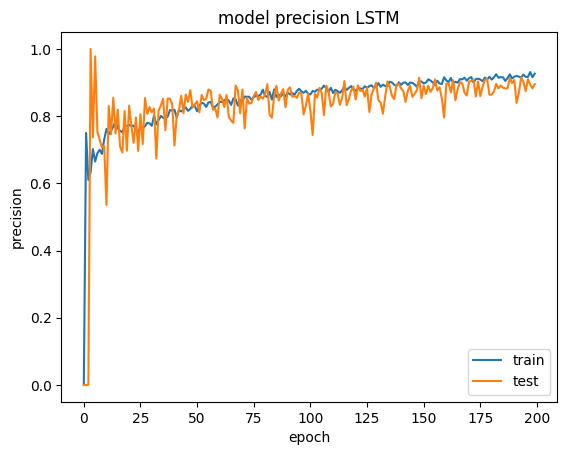

In [27]:
import matplotlib.pyplot as plt
# precion graph LSTM
plt.plot(history_lstm.history['precision'])
plt.plot(history_lstm.history['val_precision'])
plt.title('model precision LSTM')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

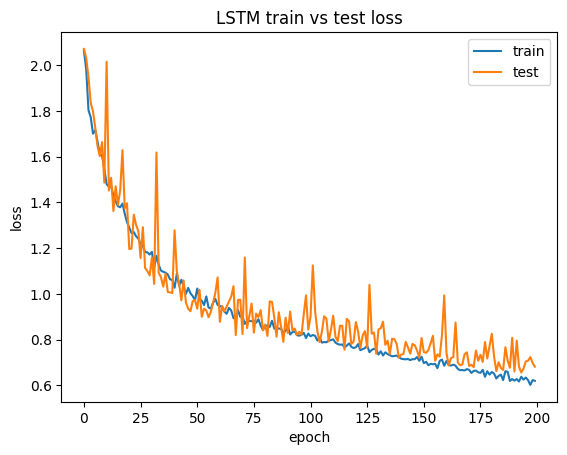

In [28]:
# loss graph LSTM
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM train vs test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [29]:
## converting y_pred to actual classes
y_pred = model_lstm.predict(X_test)

27/27 [==============================] - 3s 98ms/step


In [31]:
y_pred = y_pred.argmax(axis=1)
print(y_pred.shape)
print(y_pred)

(848,)
[6 4 7 3 2 4 3 1 3 3 1 4 7 6 7 3 0 2 7 4 7 7 0 2 6 3 7 5 0 4 4 4 3 6 5 2 7
 2 3 0 4 3 2 6 4 7 0 3 7 5 1 6 7 2 7 0 0 7 6 5 7 7 3 6 2 0 2 3 2 7 5 4 4 7
 7 5 1 6 6 6 7 7 7 4 7 0 3 5 3 4 2 2 4 1 5 0 1 0 5 4 0 2 3 0 0 0 0 3 6 6 6
 4 7 2 0 3 4 0 2 2 7 0 1 7 1 3 7 4 2 2 5 4 4 5 2 3 7 3 6 6 6 4 7 0 2 2 3 3
 0 7 0 0 4 2 1 3 4 7 2 7 2 1 2 6 6 3 3 7 7 2 6 2 1 0 6 7 4 3 4 5 7 3 0 5 0
 1 6 0 6 6 2 3 3 5 4 6 6 7 2 4 6 7 3 0 6 5 6 6 7 2 4 3 7 6 2 1 6 7 1 4 4 3
 1 5 3 3 2 0 0 2 3 4 3 7 0 2 6 1 2 2 6 7 2 2 6 7 7 7 7 7 0 7 2 1 4 2 4 6 4
 6 3 1 6 7 6 5 2 0 6 6 6 3 2 0 7 0 2 4 6 0 2 1 0 7 5 3 2 1 3 2 3 4 1 5 6 3
 2 2 0 0 0 4 7 3 0 4 3 6 0 6 0 6 6 2 2 3 0 6 2 6 2 6 0 7 3 4 3 4 3 7 2 4 1
 3 5 2 4 7 7 7 5 5 4 3 5 7 3 4 5 7 5 6 5 6 0 3 6 5 0 5 2 4 0 5 6 6 1 7 6 6
 3 4 0 4 3 7 0 3 3 7 3 3 3 2 5 6 4 5 1 7 3 0 2 1 2 7 6 2 6 1 3 2 5 5 0 6 2
 3 7 2 0 4 1 6 5 7 4 6 0 4 7 7 0 5 7 5 2 2 0 7 7 5 4 2 6 0 6 6 4 4 6 5 3 3
 6 6 2 6 5 4 0 6 5 0 4 6 7 2 2 7 1 2 7 6 5 2 7 1 5 4 6 4 3 5 0 5 0 2 6 3 4
 7 4 7 6 6 4 3 4 2

In [32]:
y_pred = lb.inverse_transform((y_pred))
y_pred

array(['sad', 'happy', 'surprised', 'fear', 'disgust', 'happy', 'fear',
       'calm', 'fear', 'fear', 'calm', 'happy', 'surprised', 'sad',
       'surprised', 'fear', 'angry', 'disgust', 'surprised', 'happy',
       'surprised', 'surprised', 'angry', 'disgust', 'sad', 'fear',
       'surprised', 'neutral', 'angry', 'happy', 'happy', 'happy', 'fear',
       'sad', 'neutral', 'disgust', 'surprised', 'disgust', 'fear',
       'angry', 'happy', 'fear', 'disgust', 'sad', 'happy', 'surprised',
       'angry', 'fear', 'surprised', 'neutral', 'calm', 'sad',
       'surprised', 'disgust', 'surprised', 'angry', 'angry', 'surprised',
       'sad', 'neutral', 'surprised', 'surprised', 'fear', 'sad',
       'disgust', 'angry', 'disgust', 'fear', 'disgust', 'surprised',
       'neutral', 'happy', 'happy', 'surprised', 'surprised', 'neutral',
       'calm', 'sad', 'sad', 'sad', 'surprised', 'surprised', 'surprised',
       'happy', 'surprised', 'angry', 'fear', 'neutral', 'fear', 'happy',
       'di

In [33]:
y_test.shape

(848, 8)

In [34]:
y_test_check = y_test.argmax(axis=1)
y_test_check = lb.inverse_transform((y_test_check))
print(y_test_check)

['neutral' 'happy' 'surprised' 'fear' 'disgust' 'happy' 'fear' 'calm'
 'happy' 'fear' 'calm' 'happy' 'surprised' 'sad' 'neutral' 'calm' 'fear'
 'surprised' 'sad' 'happy' 'surprised' 'surprised' 'angry' 'disgust' 'sad'
 'fear' 'sad' 'neutral' 'angry' 'happy' 'happy' 'happy' 'fear' 'sad'
 'neutral' 'disgust' 'surprised' 'disgust' 'fear' 'angry' 'happy'
 'surprised' 'disgust' 'sad' 'sad' 'surprised' 'angry' 'fear' 'surprised'
 'neutral' 'happy' 'sad' 'surprised' 'happy' 'surprised' 'angry' 'angry'
 'angry' 'sad' 'neutral' 'surprised' 'angry' 'fear' 'happy' 'sad' 'fear'
 'disgust' 'fear' 'angry' 'calm' 'neutral' 'happy' 'happy' 'surprised'
 'surprised' 'neutral' 'calm' 'happy' 'sad' 'neutral' 'fear' 'surprised'
 'surprised' 'happy' 'surprised' 'angry' 'calm' 'neutral' 'fear' 'happy'
 'angry' 'angry' 'disgust' 'calm' 'neutral' 'angry' 'calm' 'happy'
 'neutral' 'happy' 'angry' 'surprised' 'fear' 'angry' 'angry' 'angry'
 'angry' 'fear' 'sad' 'sad' 'sad' 'happy' 'surprised' 'disgust' 'angry'
 

In [40]:
correct = 0
for i in range (y_test_check.shape[0]):
    if y_pred[i] == y_test_check[i]:
        correct += 1

accuracy = (correct/len(y_pred))*100

In [41]:
print(accuracy)

74.41037735849056


In [53]:
test_mel =[]
test_mfcc =[]



y, sr = librosa.load('/Users/umesh/Desktop/Speech_recognition_project/03-01-03-01-01-02-14.wav')
test_mel.append(np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis= 0))
test_mfcc.append(np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 13).T, axis=0))

print(len(test_mel))
print(len(test_mfcc))

1
1


In [55]:
test_mel = test_mel[0].reshape(1, -1)
test_mfcc = test_mfcc[0].reshape(1, -1)

print(test_mel.shape)
print(test_mfcc.shape)

(1, 128)
(1, 13)


In [58]:
test_feat = hstack((test_mel, test_mfcc))

/var/folders/g1/59v3z_793_g5rymttcvqyfcm0000gn/T/ipykernel_38498/3976334242.py:1: DeprecationWarning: scipy.hstack is deprecated and will be removed in SciPy 2.0.0, use numpy.hstack instead
  test_feat = hstack((test_mel, test_mfcc))


In [59]:
test_feat.shape

(1, 141)

In [60]:
prediction = model_lstm.predict(test_feat)

1/1 [==============================] - 0s 88ms/step


In [61]:
prediction.shape

(1, 8)

In [67]:
prediction = prediction.argmax(axis=1)

print(prediction)

[6]


In [68]:
prediction = lb.inverse_transform((prediction))
print(prediction)

['sad']
